In [ ]:
import numpy as np

def generate_samples(start, end):
    samples = []
    for n in range(start, end):
        x = 1 + np.cos(n + np.cos(n)**2)
        samples.append(x)
    return samples

# Gerar amostras para treinamento e teste
train_samples = generate_samples(0, 400)
test_samples = generate_samples(400, 500)


In [ ]:
def prepare_data(samples, input_length):
    data_x = []
    data_y = []
    for i in range(len(samples) - input_length - 1):
        x = samples[i:i+input_length]
        y = samples[i+input_length]
        data_x.append(x)
        data_y.append(y)
    return np.array(data_x), np.array(data_y)

# Preparar os dados de treinamento
input_length = 4
train_x, train_y = prepare_data(train_samples, input_length)

# Preparar os dados de teste
test_x, test_y = prepare_data(test_samples, input_length)



In [ ]:
from tensorflow import keras

# Construir a rede neural
model = keras.Sequential()
model.add(keras.layers.Dense(10, input_dim=input_length, activation='relu'))
model.add(keras.layers.Dense(1))

# Compilar a rede neural
model.compile(loss='mean_squared_error', optimizer='adam')

# Treinar a rede neural
history = model.fit(train_x, train_y, epochs=25, batch_size=32, verbose=1)


Epoch 1/25
13/13 [==============================] - 1s 3ms/step - loss: 2.3733
Epoch 2/25
13/13 [==============================] - 0s 3ms/step - loss: 1.9700
Epoch 3/25
13/13 [==============================] - 0s 3ms/step - loss: 1.6337
Epoch 4/25
13/13 [==============================] - 0s 3ms/step - loss: 1.3674
Epoch 5/25
13/13 [==============================] - 0s 3ms/step - loss: 1.1701
Epoch 6/25
13/13 [==============================] - 0s 3ms/step - loss: 1.0293
Epoch 7/25
13/13 [==============================] - 0s 3ms/step - loss: 0.9321
Epoch 8/25
13/13 [==============================] - 0s 3ms/step - loss: 0.8719
Epoch 9/25
13/13 [==============================] - 0s 3ms/step - loss: 0.8253
Epoch 10/25
13/13 [==============================] - 0s 3ms/step - loss: 0.7884
Epoch 11/25
13/13 [==============================] - 0s 3ms/step - loss: 0.7510
Epoch 12/25
13/13 [==============================] - 0s 3ms/step - loss: 0.7189
Epoch 13/25
13/13 [==============================

3/3 [==============================] - 0s 3ms/step


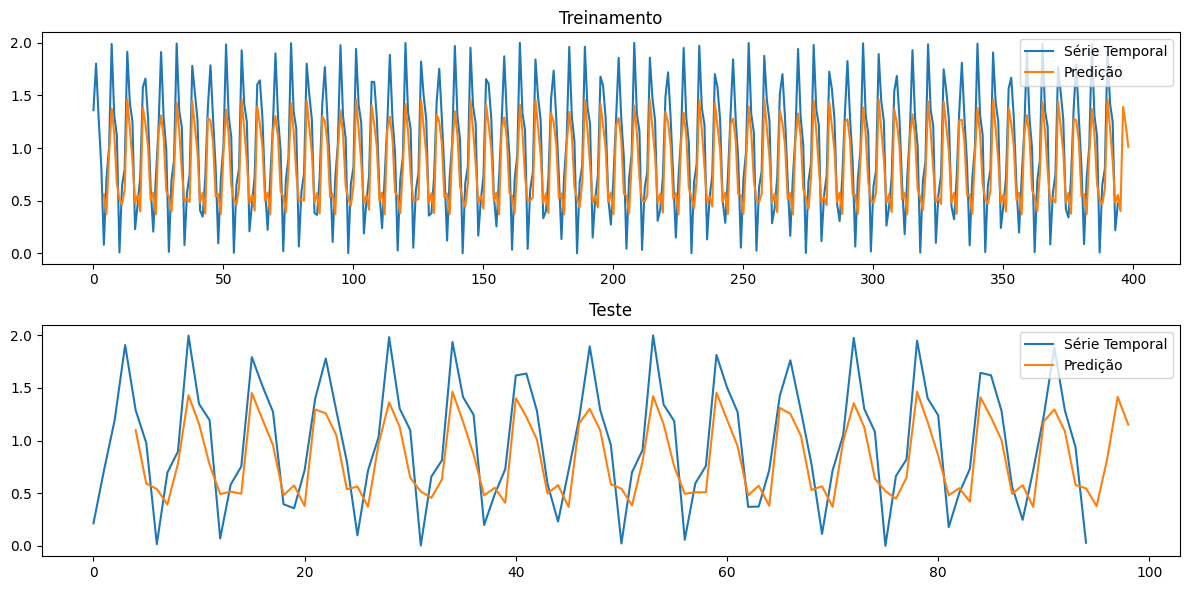

In [ ]:
import matplotlib.pyplot as plt

# Realizar a predição
train_pred = model.predict(train_x)
test_pred = model.predict(test_x)

# Calcular o erro de predição
train_error = train_y - train_pred.flatten()
test_error = test_y - test_pred.flatten()

# Plotar as curvas
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(train_samples[input_length+1:], label='Série Temporal')
plt.plot(np.arange(input_length, len(train_samples)-1), train_pred, label='Predição')
plt.title('Treinamento')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(test_samples[input_length+1:], label='Série Temporal')
plt.plot(np.arange(input_length, len(test_samples)-1), test_pred, label='Predição')
plt.title('Teste')
plt.legend()

plt.tight_layout()
plt.show()


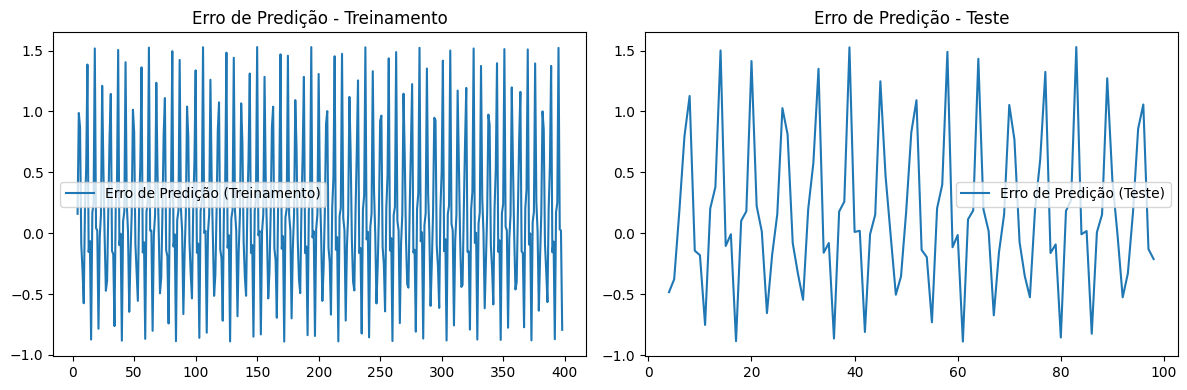

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(np.arange(input_length, len(train_samples)-1), train_error, label='Erro de Predição (Treinamento)')
plt.title('Erro de Predição - Treinamento')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.arange(input_length, len(test_samples)-1), test_error, label='Erro de Predição (Teste)')
plt.title('Erro de Predição - Teste')
plt.legend()

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Perda')

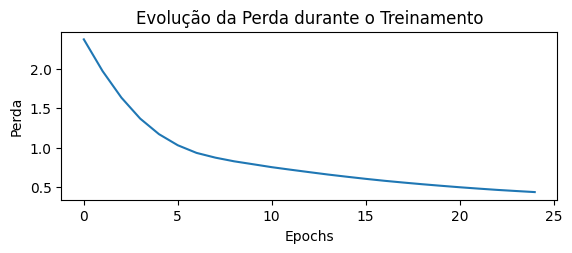

In [ ]:
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.title('Evolução da Perda durante o Treinamento')
plt.xlabel('Epochs')
plt.ylabel('Perda')
